## Carregando a base

In [1]:
from pycaret.datasets import get_data
boston = get_data('boston')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Treino e Teste

In [3]:
dados = boston.sample(frac=0.8, random_state=123)
dados_teste = boston.drop(dados.index)

In [4]:
dados.shape

(405, 14)

In [5]:
dados_teste.shape

(101, 14)

## Modelando

In [6]:
from pycaret.regression import *

### Iniciando

O primeiro passo da modelagem consiste em criar o pipeline para a implantação e modelagem dos dados. Isso é feito como comando *setup*. Basicamente ele precisa de dois comandos: um dataframe  (ou matriz) com os dados e a variável resposta. Todos os demais parâmetros são opcionais. (Consulta ?setup)

In [21]:
regressao = setup(data = dados, target = 'medv', session_id=12)

,Description,Value
0,session_id,12
1,Target,medv
2,Original Data,"(405, 14)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(283, 21)"


## Criando o modelo

In [22]:
lasso = create_model('lasso')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.4762,46.5990,6.8263,0.5958,0.2375,0.1873
1,4.2703,38.3205,6.1904,0.5412,0.2115,0.1810
2,3.3004,23.4091,4.8383,0.7523,0.2532,0.1968
3,4.1960,28.9467,5.3802,0.6613,0.2351,0.2264
4,4.5040,32.3379,5.6866,0.6396,0.2016,0.1915
5,3.1357,19.6575,4.4337,0.6390,0.4994,0.1607
6,5.1033,46.2285,6.7992,0.5847,0.5904,0.2307
7,2.5996,11.7788,3.4320,0.8265,0.1511,0.1302
8,3.0650,16.0145,4.0018,0.7580,0.1716,0.1496
9,2.6140,9.9069,3.1475,0.7384,0.3010,0.1549


O mais interessante da função create_model é que ela já faz o treinamento do modelo utilizando uma cross-validation e nos retorna as métricas

## Realizando a tunagem dos hiperparâmetros

In [23]:
lasso_tune = tune_model(lasso)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.7543,71.6871,8.4668,0.3781,0.2916,0.2415
1,4.5807,49.2960,7.0211,0.4098,0.2446,0.1968
2,3.9442,32.7452,5.7223,0.6535,0.2572,0.2122
3,3.9198,32.7591,5.7236,0.6166,0.2413,0.2156
4,4.7446,46.4995,6.8191,0.4818,0.2268,0.1916
5,3.5532,20.5621,4.5345,0.6224,0.2743,0.1725
6,5.5176,51.6537,7.1871,0.5359,0.3455,0.2336
7,3.6358,22.1147,4.7026,0.6743,0.1767,0.1611
8,3.5088,17.4312,4.1751,0.7366,0.1998,0.1957
9,3.0640,15.4452,3.9300,0.5921,0.1889,0.1639


In [24]:
print(lasso_tune)

Lasso(alpha=8.29, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=12,
      selection='cyclic', tol=0.0001, warm_start=False)


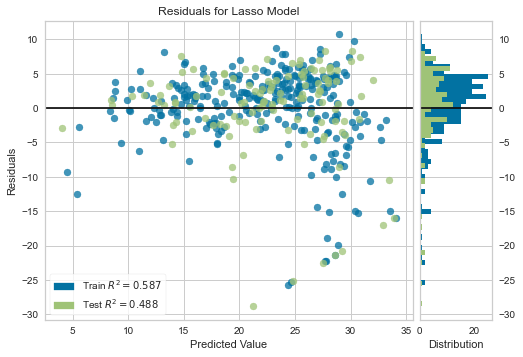

In [25]:
plot_model(lasso_tune)

## Verificando as features



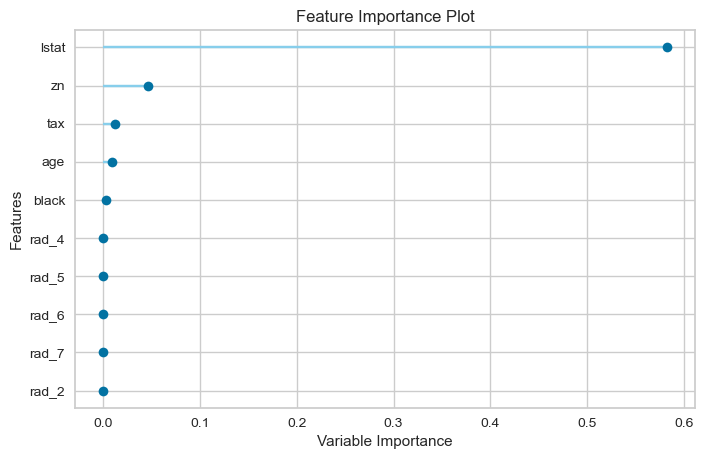

In [26]:
plot_model(lasso_tune, plot='feature')

O comando evaluate_model é fantástico! Com ele podemos avaliar o desempenho do modelo com diferentes tipos de gráficos e análises.

In [27]:
evaluate_model(lasso_tune)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Finalizando o modelo

In [30]:
final_lasso = finalize_model(lasso_tune)
print(final_lasso)

Lasso(alpha=8.29, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=12,
      selection='cyclic', tol=0.0001, warm_start=False)


## Fazendo predições e testando o modelo

In [34]:
teste_lasso = predict_model(final_lasso, data = dados_teste)
teste_lasso

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Label
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,26.050386
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,28.905745
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,29.499954
17,0.78420,0.0,8.14,0,0.538,5.990,81.7,4.2579,4,307,21.0,386.75,14.67,17.5,21.988729
18,0.80271,0.0,8.14,0,0.538,5.456,36.6,3.7965,4,307,21.0,288.99,11.69,20.2,22.296272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711,20.1,344.05,23.97,7.0,12.628197
492,0.11132,0.0,27.74,0,0.609,5.983,83.5,2.1099,4,711,20.1,396.90,13.35,20.1,19.432800
497,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391,19.2,396.90,14.10,18.3,21.496580
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,28.199047


A coluna *Label* contém as predições do modelo construído. Vamos olhar para as métricas de desempenho:

In [35]:
from pycaret.utils import check_metric


In [36]:
check_metric(teste_lasso.medv, teste_lasso.Label, 'R2')

0.4303

In [37]:
check_metric(teste_lasso.medv, teste_lasso.Label, 'MAPE')

0.2063

In [38]:
check_metric(teste_lasso.medv, teste_lasso.Label, 'RMSE')

49.3531

## Salvando o modelo

In [39]:
#save_model(final_lasso, 'Modelo Lasso 27may21')


## TESTANDO DIFERENTES MODELOS

Outro benefício do *pycaret* está na função **compare_models**.

Esta deve ser a primeira etapa do fluxo de trabalho de qualquer experimento supervisionado. Esta função treina todos os modelos na biblioteca de modelos usando hiperparâmetros padrão e avalia as métricas de desempenho usando validação cruzada. Ele retorna o objeto de modelo treinado. As métricas de avaliação utilizadas são:

Regressão:  MAE, MSE, RMSE, R2, RMSLE, MAPE.

In [40]:
comp_reg = setup(data = dados, target = 'medv')

,Description,Value
0,session_id,823
1,Target,medv
2,Original Data,"(405, 14)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(283, 21)"


In [43]:
comparative = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.2780,12.3465,3.3460,0.8459,0.1548,0.1198,0.0550
gbr,Gradient Boosting Regressor,2.3804,13.4963,3.4714,0.8419,0.1592,0.1243,0.0200
rf,Random Forest Regressor,2.4547,14.9169,3.6064,0.8281,0.1645,0.1281,0.0670
lightgbm,Light Gradient Boosting Machine,2.5385,15.9780,3.7980,0.8130,0.1689,0.1305,0.0110
ada,AdaBoost Regressor,3.0671,17.9319,4.0672,0.7867,0.1879,0.1621,0.0240
lr,Linear Regression,3.4589,23.5457,4.6753,0.7284,0.2489,0.1754,0.0070
lar,Least Angle Regression,3.4589,23.5458,4.6753,0.7284,0.2489,0.1753,0.0070
ridge,Ridge Regression,3.4264,23.7676,4.6947,0.7249,0.2419,0.1758,0.0060
br,Bayesian Ridge,3.4542,24.6012,4.7836,0.7154,0.2413,0.1773,0.0060
huber,Huber Regressor,3.5045,25.6109,4.8179,0.7054,0.2844,0.1790,0.0130


Podemos selecionar a métrica para retorno do modelo com melhor desempenho, que por default é o R2:


In [46]:
select_best = compare_models(sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.2780,12.3465,3.3460,0.8459,0.1548,0.1198,0.0590
gbr,Gradient Boosting Regressor,2.3804,13.4963,3.4714,0.8419,0.1592,0.1243,0.0220
rf,Random Forest Regressor,2.4547,14.9169,3.6064,0.8281,0.1645,0.1281,0.0680
lightgbm,Light Gradient Boosting Machine,2.5385,15.9780,3.7980,0.8130,0.1689,0.1305,0.0100
ada,AdaBoost Regressor,3.0671,17.9319,4.0672,0.7867,0.1879,0.1621,0.0260
lr,Linear Regression,3.4589,23.5457,4.6753,0.7284,0.2489,0.1754,0.0050
lar,Least Angle Regression,3.4589,23.5458,4.6753,0.7284,0.2489,0.1753,0.0060
ridge,Ridge Regression,3.4264,23.7676,4.6947,0.7249,0.2419,0.1758,0.0050
br,Bayesian Ridge,3.4542,24.6012,4.7836,0.7154,0.2413,0.1773,0.0070
huber,Huber Regressor,3.5045,25.6109,4.8179,0.7054,0.2844,0.1790,0.0110


Na documentação do pacote, podemos consultar outras funcionalidades dessa função.